# Yahoo Web Scraper

This notebook will give you the Stock Indexes for 3 signatures trenging on Yahoo finance main page.

### Import neccessary libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from plotnine import *
from give_me_trend import give_me_trend
from date_conversion import date_conversion
from give_me_top3Data import give_me_top3data

### Obtain the top 3 Stock Indexes signatures of the stock market trenging on Yahoo finance's main page
Use _Give_me_trend()_ function to obtain Top 3 trending companies in Yahoo finances and the urls.
The top 3 selected may vary if you are using VPNs due to Yahoo's website performing some rerouting based on language settings, etc.

In [2]:
trends = give_me_trend()

Create variable _urls_ with only the urls to get the last stock data for each company

In [3]:
urls = trends.iloc[:,1]

Use _give_me_top3data_ function to obtain dataframe with the stock's closing price for each url.


In [4]:
top3Table = give_me_top3data(urls)

### Plot stock data for each company

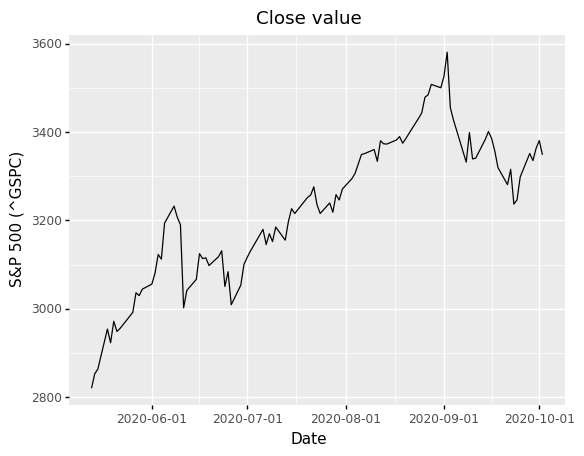

<ggplot: (184388918613)>

In [5]:
ggplot(top3Table) + \
    aes(x='Date', y = top3Table.columns[1]) + \
    geom_path() + \
    ggtitle("Close value")

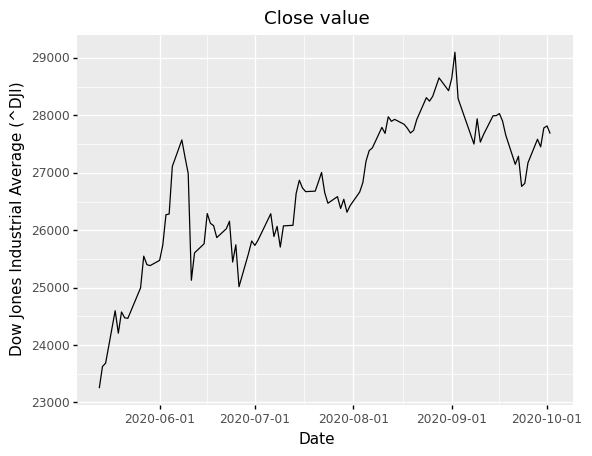

<ggplot: (184388311513)>

In [6]:
ggplot(top3Table) + \
    aes(x='Date', y = top3Table.columns[2]) + \
    geom_path() + \
    ggtitle("Close value")

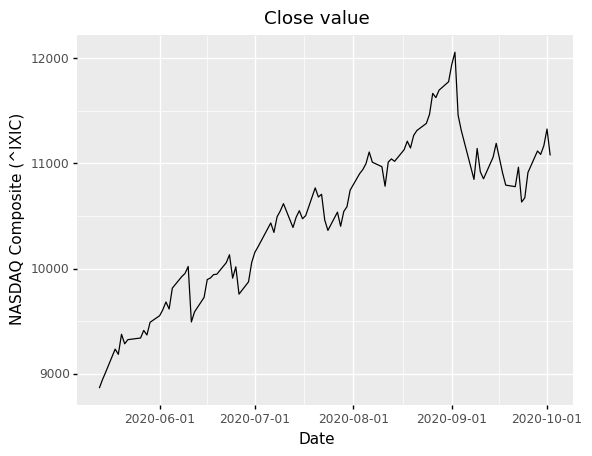

<ggplot: (184389068683)>

In [7]:
ggplot(top3Table) + \
    aes(x='Date', y = top3Table.columns[3]) + \
    geom_path() + \
    ggtitle("Close value")

### Restructure dataframe to be able to plot the closing values of the 3 top signatures in the same graph

In [8]:
top3TableM = pd.melt(top3Table, id_vars = 'Date', value_vars=[top3Table.columns[1], top3Table.columns[2], top3Table.columns[3]])

### Plot the new dataframe

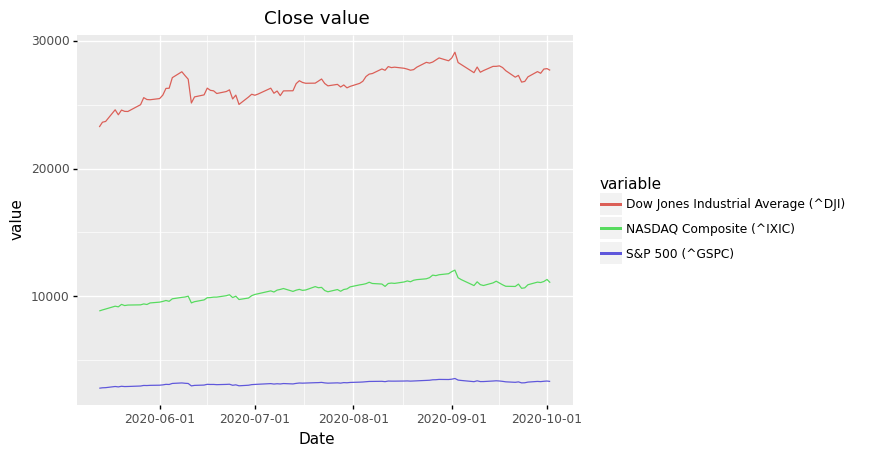

<ggplot: (184389102496)>

In [10]:
ggplot(top3TableM) + \
    aes(x='Date') + \
    geom_line(aes(y=top3TableM.value, color=top3TableM.variable)) + \
    ggtitle("Close value")